<a href="https://colab.research.google.com/github/Jahnavi2005s/ML-PROJECT-/blob/main/salarypredicate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
Random Forest R^2 Score: 0.8899, MAE: 6542.4081, MSE: 56217984.8813
XGBoost R^2 Score: 0.7976, MAE: 8912.2998, MSE: 103404576.0000


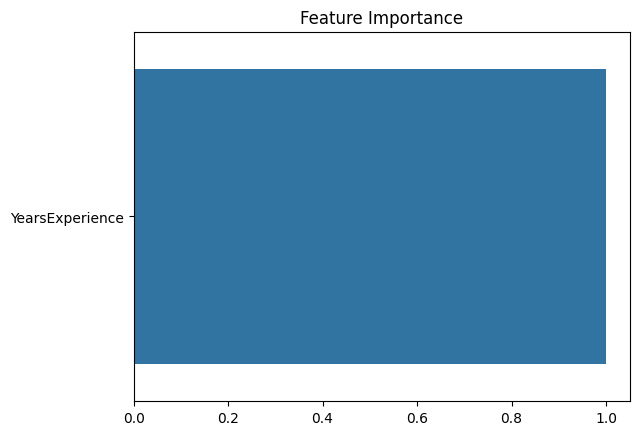

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset (Assuming it's in CSV format)
data = pd.read_csv("/content/Salary_Data.csv")

# Display basic information about the dataset
print(data.head())
print(data.info())
print(data.describe())

# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables if any
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# **Get actual column names from the DataFrame**
# print(data.columns)  # Print the available columns to inspect them

# **Replace with your actual column names**
# Assuming your actual columns are named 'YearsExperience' and 'Salary'
X = data[['YearsExperience']]  # Replace with actual column names
y = data['Salary']  # Replace with actual column name


# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate performance
rf_r2 = r2_score(y_test, rf_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)

print(f"Random Forest R^2 Score: {rf_r2:.4f}, MAE: {rf_mae:.4f}, MSE: {rf_mse:.4f}")
print(f"XGBoost R^2 Score: {xgb_r2:.4f}, MAE: {xgb_mae:.4f}, MSE: {xgb_mse:.4f}")

# Visualize feature importance
feature_importance = rf_model.feature_importances_
features = ['YearsExperience']  # Replace with actual column names used in X
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.show()